# Nova Scotia Provincial High Precision Survey Control Points

**1. Import Libraries**

In [1]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**2. Connect to Provincial Monument Dataset and Import into a Pandas DataFrame**

https://data.novascotia.ca/Lands-Forests-and-Wildlife/Nova-Scotia-Control-Monuments/jdf8-5rt8/about_data

Data Summary:

***Nova Scotia Control Monuments
Lands, Forests and Wildlife
The Nova Scotia Control Monuments (NSCM) dataset is updated and maintained from ongoing observations on survey monuments. The NSCM indicates the locations of physical survey monuments in Nova Scotia. Information includes the Station Number, Station Name, Station Description, Monument Type, Monument Status, Status Date, Construction Date, GPS suitability and general comments.***

In [11]:
# Initialize empty Dataframe
data = pd.DataFrame()

# Intial Loop Parameters
offset = 0
response = requests.get(r"https://data.novascotia.ca/resource/jdf8-5rt8.json?$offset=" + str(offset))

# Loop through all records
while str(response.json()) != "[]":
    response = requests.get(r"https://data.novascotia.ca/resource/jdf8-5rt8.json?$offset=" + str(offset))
    temp = pd.read_json(response.text)
    data = pd.concat([data, temp], ignore_index=True)
    offset += 1000
data.head(5)

,the_geom,stationnum,stationtyp,montypedes,monstatdes,replace_by,replaces,gpsdes,nsccs_nd27,nsccs_at77,statusdate,constdate,stationdes,nshpn,stationnam,comments,nsacs
0,"{'type': 'Point', 'coordinates': [-60.67877237...",219600,NS Coordinate Control Station,Federal 1st Order,Intact,0.0,0.0,Unknown,1.0,1.0,1984-07-01T00:00:00,1921-06-01T00:00:00,NaN,NaN,NaN,NaN,NaN
1,"{'type': 'Point', 'coordinates': [-60.29396267...",201281,NS Coordinate Control Station,Standard Poured Monument,Intact,0.0,0.0,Unknown,1.0,1.0,1990-06-01T00:00:00,1969-06-01T00:00:00,NaN,NaN,NaN,NaN,NaN
2,"{'type': 'Point', 'coordinates': [-60.26477990...",201287,NS Coordinate Control Station,Standard Poured Monument,Intact,0.0,0.0,Unknown,1.0,1.0,1990-06-01T00:00:00,1969-06-01T00:00:00,NaN,NaN,NaN,NaN,NaN
3,"{'type': 'Point', 'coordinates': [-60.15094280...",201027,NS Coordinate Control Station,Standard Poured Monument,Damaged,0.0,0.0,Unknown,1.0,1.0,1991-05-01T00:00:00,1969-06-01T00:00:00,NaN,NaN,NaN,NaN,NaN
4,"{'type': 'Point', 'coordinates': [-60.09131545...",201039,NS Coordinate Control Station,Standard Poured Monument,Reported Destroyed,0.0,0.0,Unknown,1.0,1.0,1991-05-01T00:00:00,1969-06-01T00:00:00,NaN,NaN,NaN,NaN,NaN


**3. Query Data**

Query the Dataset for all Non-Intact Monument Satatuses

In [12]:
# Query momument statuses of all monuments not intact
# Get count of total monuments in each status category
status  = data[data['monstatdes'] != 'Intact'].stationtyp.groupby(data['monstatdes']).count()
status

monstatdes
Damaged                104
Declared Destroyed    1193
Destroyed             2501
Disturbed                2
Inaccessible            84
Not Located            697
Reported Destroyed     205
Reported Disturbed      58
Unknown                 82
Name: stationtyp, dtype: int64

**4. Plot Monument Status**

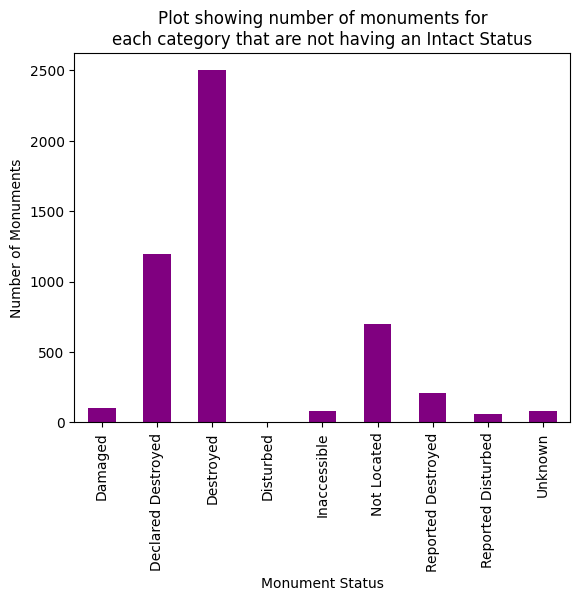

In [13]:
# Plot the results of above query to show the number of monuments in each status category

status.plot(kind='bar', color='purple')
plt.xlabel("Monument Status")
plt.ylabel("Number of Monuments")
plt.title("Plot showing number of monuments for\neach category that are not having an Intact Status")
plt.show()